In [54]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [42]:
client_data=pd.read_csv('Churn_Modelling.csv')

In [44]:
client_data.set_index('RowNumber',inplace=True)

In [45]:
client_data.drop(['Surname','CustomerId'],axis=1,inplace=True)

In [48]:
from sklearn import preprocessing

In [49]:
le = preprocessing.LabelEncoder()
le.fit(client_data['Gender'])
client_data['Gender'] = le.transform(client_data['Gender'])

In [51]:
le.fit(client_data['Geography'])
client_data['Geography'] = le.transform(client_data['Geography'])

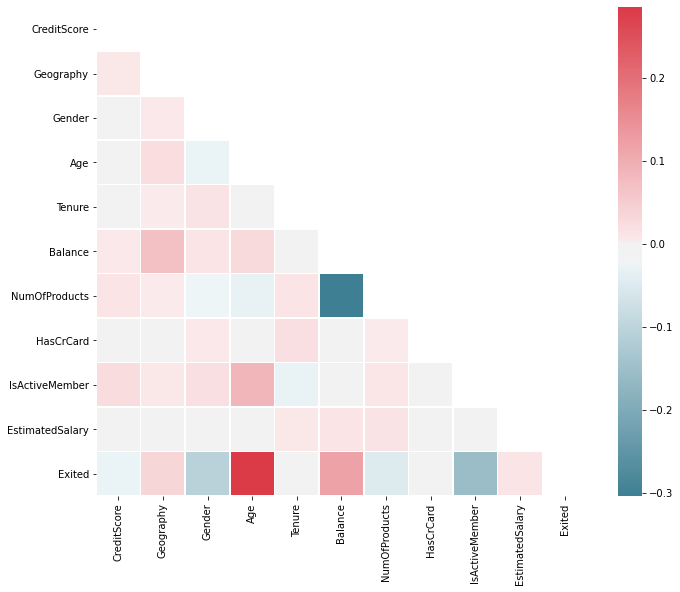

In [55]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a mask for the upper triangle
corr = client_data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Plot correlation matrix
sns.heatmap(corr, cmap =cmap,linewidths=.5, mask=mask)

In [60]:
X=client_data.iloc[:,0:10]
Y=client_data.iloc[:,-1]

In [70]:
client_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,0,1,39,5,0.00,2,1,0,96270.64,0
9997,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9998,709,0,0,36,7,0.00,1,0,1,42085.58,1


In [73]:
#normalize Y data
from sklearn.preprocessing import LabelEncoder
mylabel_encoder=LabelEncoder()
Y=mylabel_encoder.fit_transform(Y)

In [75]:
#split into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=0)

In [76]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [77]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [78]:
#Initialize model
model=tf.keras.Sequential()

In [97]:
model.add(Dense(16,input_dim=10,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.add(Dropout(0.1))

In [98]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [99]:
history = model.fit(X_train, Y_train, epochs=150)

Epoch 1/150
282/282 [==============================] - 1s 1ms/step - loss: 0.8519 - accuracy: 0.6863
Epoch 2/150
282/282 [==============================] - 0s 1ms/step - loss: 0.7580 - accuracy: 0.7984
Epoch 3/150
282/282 [==============================] - 0s 1ms/step - loss: 0.7495 - accuracy: 0.7913
Epoch 4/150
282/282 [==============================] - 0s 1ms/step - loss: 0.7183 - accuracy: 0.8044
Epoch 5/150
282/282 [==============================] - 0s 1ms/step - loss: 0.7800 - accuracy: 0.7919
Epoch 6/150
282/282 [==============================] - 0s 1ms/step - loss: 0.7492 - accuracy: 0.8026
Epoch 7/150
282/282 [==============================] - 0s 1ms/step - loss: 0.8235 - accuracy: 0.7960
Epoch 8/150
282/282 [==============================] - 0s 1ms/step - loss: 0.7646 - accuracy: 0.8000
Epoch 9/150
282/282 [==============================] - 0s 1ms/step - loss: 0.7258 - accuracy: 0.7934
Epoch 10/150
282/282 [==============================] - 0s 1ms/step - loss: 0.8149 - accura

In [100]:
#Check model performance on data
y_pred=model.predict(X_test)

In [104]:
a=np.round(y_pred.flatten())

In [107]:
len(np.argwhere(a==Y_test).flatten())

824

In [108]:
824/1000

0.824

In [ ]:
#82.4% of results have been predicted correctly. Currently looking at ways to improve accuracy. 